<a href="https://colab.research.google.com/github/pbeles/pbeles-NLP_project_j/blob/main/3_classifiers%2001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INITIAL MODEL

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/2
1708/1708 [==============================] - 420s 220ms/step - loss: 0.0967 - accuracy: 0.9641
Epoch 2/2
1708/1708 [==============================] - 142s 81ms/step - loss: 0.0122 - accuracy: 0.9961


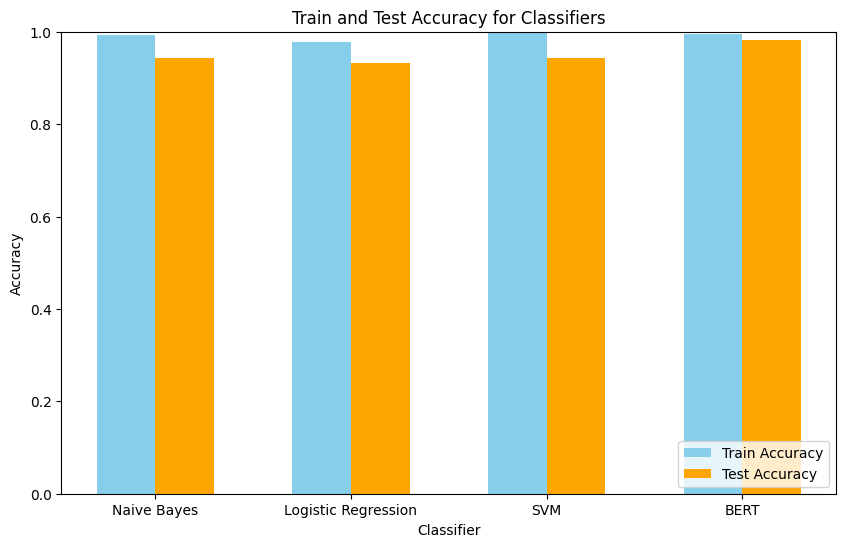

Test Accuracy for Naive Bayes Classifier: 94.35%
Test Accuracy for Logistic Regression Classifier: 93.30%
Test Accuracy for SVM Classifier: 94.32%
Test Accuracy for BERT Classifier: 98.11%
427/427 [==============================] - 36s 76ms/step
First 50 Predictions for Naive Bayes Classifier:
[1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1
 0 1 1 1 1 0 0 1 0 0 0 1 0]
First 50 Predictions for Logistic Regression Classifier:
[1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1
 1 1 1 1 1 0 1 1 0 0 0 1 0]
First 50 Predictions for SVM Classifier:
[1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1
 1 1 1 1 1 0 1 1 0 0 0 1 0]
First 50 Predictions for BERT Classifier:
[1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1
 1 1 1 1 1 0 1 0 0 0 0 1 0]


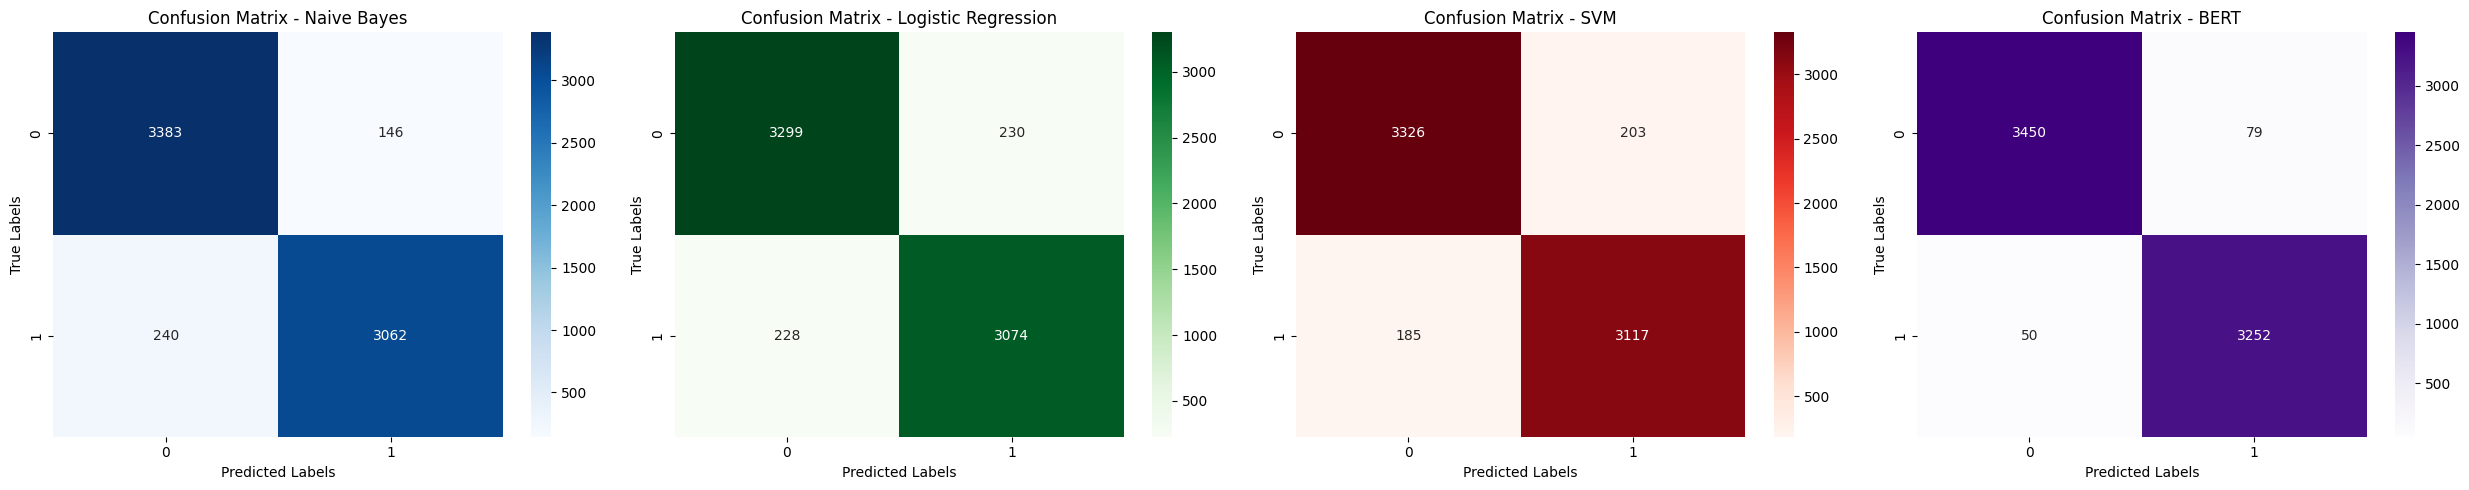

In [3]:
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
import numpy as np

# Load dataset
file_path = '/content/training_data_lowercase.csv'
data = pd.read_csv(file_path, delimiter='\t', header=None, names=['label', 'text'])

# Train-test split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Data Preprocessing
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove single characters
    text = re.sub(r'\b[a-zA-Z]\b', '', text)
    # Substitute multiple spaces with single space
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Define stopwords using NLTK
def define_stopwords():
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    return set(stopwords.words('english'))

stop_words = define_stopwords()

# Remove stopwords function
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

# Lemmatize text (placeholder function)
def lemmatize_text(text):
    return ' '.join([word for word in text.split()])  # This will keep the words unchanged

# Apply preprocessing, stopword removal, and lemmatization
train_data['processed_text'] = train_data['text'].apply(preprocess_text)
test_data['processed_text'] = test_data['text'].apply(preprocess_text)

train_data['processed_text'] = train_data['processed_text'].apply(remove_stopwords)
test_data['processed_text'] = test_data['processed_text'].apply(remove_stopwords)

train_data['processed_text'] = train_data['processed_text'].apply(lemmatize_text)
test_data['processed_text'] = test_data['processed_text'].apply(lemmatize_text)

# Feature Representation - TF-IDF Vectorizer with n-grams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['processed_text'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['processed_text'])

# Train the classifiers
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, train_data['label'])

lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, train_data['label'])

svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train_tfidf, train_data['label'])

# Predictions
y_pred_nb = nb_classifier.predict(X_test_tfidf)
y_pred_lr = lr_classifier.predict(X_test_tfidf)
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Accuracy Scores
nb_train_accuracy = nb_classifier.score(X_train_tfidf, train_data['label'])
nb_test_accuracy = accuracy_score(test_data['label'], y_pred_nb)

lr_train_accuracy = lr_classifier.score(X_train_tfidf, train_data['label'])
lr_test_accuracy = accuracy_score(test_data['label'], y_pred_lr)

svm_train_accuracy = svm_classifier.score(X_train_tfidf, train_data['label'])
svm_test_accuracy = accuracy_score(test_data['label'], y_pred_svm)

# BERT Classifier
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tokenizing the text for BERT
train_encodings = bert_tokenizer(list(train_data['text']), truncation=True, padding=True, max_length=128)
test_encodings = bert_tokenizer(list(test_data['text']), truncation=True, padding=True, max_length=128)

train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_data['label'])).batch(16)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_data['label'])).batch(16)

# Compile and train BERT model
bert_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
bert_model.fit(train_dataset, epochs=2, batch_size=16)

# Evaluate BERT model
bert_eval = bert_model.evaluate(test_dataset)
bert_train_accuracy = bert_model.evaluate(train_dataset)[1]
bert_test_accuracy = bert_eval[1]

# Combined Bar Plot for Train and Test Accuracy
plt.figure(figsize=(10, 6))
indices = np.arange(4)
width = 0.3

train_accuracies = [nb_train_accuracy, lr_train_accuracy, svm_train_accuracy, bert_train_accuracy]
test_accuracies = [nb_test_accuracy, lr_test_accuracy, svm_test_accuracy, bert_test_accuracy]
classifiers = ['Naive Bayes', 'Logistic Regression', 'SVM', 'BERT']

plt.bar(indices - width/2, train_accuracies, width, color='skyblue', label='Train Accuracy')
plt.bar(indices + width/2, test_accuracies, width, color='orange', label='Test Accuracy')

plt.ylim(0, 1)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for Classifiers')
plt.xticks(indices, classifiers)
plt.legend(loc='lower right')
plt.show()

# Print test accuracy for each classifier
print("Test Accuracy for Naive Bayes Classifier: {:.2f}%".format(nb_test_accuracy * 100))
print("Test Accuracy for Logistic Regression Classifier: {:.2f}%".format(lr_test_accuracy * 100))
print("Test Accuracy for SVM Classifier: {:.2f}%".format(svm_test_accuracy * 100))
print("Test Accuracy for BERT Classifier: {:.2f}%".format(bert_test_accuracy * 100))

# Generate predictions for BERT
y_pred_bert_logits = bert_model.predict(test_dataset).logits
y_pred_bert = np.argmax(y_pred_bert_logits, axis=1)

# Print first 50 predictions for every classifier
print("First 50 Predictions for Naive Bayes Classifier:")
print(y_pred_nb[:50])

print("First 50 Predictions for Logistic Regression Classifier:")
print(y_pred_lr[:50])

print("First 50 Predictions for SVM Classifier:")
print(y_pred_svm[:50])

print("First 50 Predictions for BERT Classifier:")
print(y_pred_bert[:50])

# Confusion Matrices for all classifiers
fig, axes = plt.subplots(1, 4, figsize=(25, 5))

# Confusion Matrix for Naive Bayes
conf_matrix_nb = confusion_matrix(test_data['label'], y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Naive Bayes')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Confusion Matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(test_data['label'], y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, cmap='Greens', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Logistic Regression')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(test_data['label'], y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, cmap='Reds', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - SVM')
axes[2].set_xlabel('Predicted Labels')
axes[2].set_ylabel('True Labels')

# Confusion Matrix for BERT
conf_matrix_bert = confusion_matrix(test_data['label'], y_pred_bert)
sns.heatmap(conf_matrix_bert, annot=True, cmap='Purples', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - BERT')
axes[3].set_xlabel('Predicted Labels')
axes[3].set_ylabel('True Labels')

plt.tight_layout()
plt.show()